# SM Fig. 2: signal-signal factorization vs simplified factorization measure

## Panel (A): ReLU MLP across layers

First, update the `outdir` below to the same value set in `code/run_mlp_exps.py` and `figdir` to wherever you want to output figure panels. Also make sure `codedir` points to the `code` folder in this repository wherever you cloned it.

In [86]:
outdir = '/mnt/home/wslatton/population_geometry_opt_coding/results'
figdir = '/mnt/home/wslatton/population_geometry_opt_coding/figures/pngs'
codedir = '/mnt/home/wslatton/population_geometry_opt_coding/code'

import sys

sys.path.append(codedir)

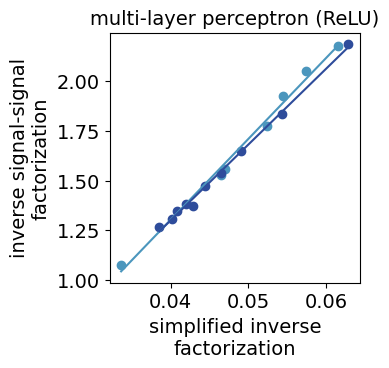

In [102]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup(ax_width, ax_height):
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    base_font_size = 14.0
    default_width = plt.rcParams['figure.figsize'][0]
    width_inches = ax_width / 0.8
    height_inches = ax_height / 0.8
    #scale_factor = width_inches / default_width
    scaled_size = base_font_size #* scale_factor
    plt.rcParams.update({
        'font.size': scaled_size,
        'axes.labelsize': scaled_size,
        'axes.titlesize': scaled_size,
        'xtick.labelsize': scaled_size,
        'ytick.labelsize': scaled_size,
        'legend.fontsize': scaled_size
    })
    fig, ax = plt.subplots(1, 1, figsize=(width_inches, height_inches))
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    return fig, ax

def plot_series_with_fit(ax, x, y, color="k", linestyle="solid", label=""):
    best_fit = LinearRegression().fit(x.reshape(-1, 1), y)
    x_min = np.min(x)
    x_max = np.max(x)
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color=color, linestyle=linestyle, label=label
    )
    ax.scatter(x, y, color=color)

def panel_mlp_relu_layerwise(fig, ax):
    outpath = outdir + '/mlp_exps_P_500000_nonlin_relu_alpha_0.2'
    res = np.load(outpath + '/eg_geom_results.npy', allow_pickle=True).item()
    rand_layer_names, errs_the_rand, errs_emp_rand, geoms_rand , \
    trained_layer_names, errs_the_train, errs_emp_train, geoms_train, \
    val_losses, train_losses, svm_rand, svm_train, \
    derrs_t, derrs_e, dgeoms, ps, dsvm = res.values() 
    plot_series_with_fit(ax, geoms_rand[:, 4], 1 / geoms_rand[:, 2], color='#4B96BD', label="random")
    plot_series_with_fit(ax, geoms_train[:, 4], 1 / geoms_train[:, 2], color='#2E4C9B', label="trained")

    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title("multi-layer perceptron (ReLU)")

fig, ax = setup(2.5, 2.5)
panel_mlp_relu_layerwise(fig, ax)
fig

## Panel (B): tanh MLP across layers

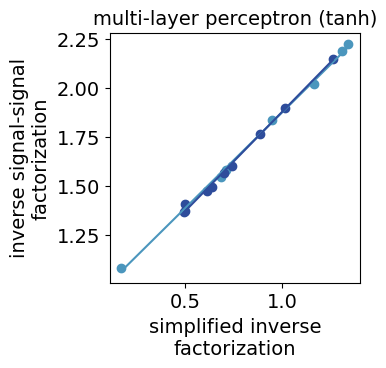

In [ ]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup(ax_width, ax_height):
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    base_font_size = 14.0
    default_width = plt.rcParams['figure.figsize'][0]
    width_inches = ax_width / 0.8
    height_inches = ax_height / 0.8
    #scale_factor = width_inches / default_width
    scaled_size = base_font_size #* scale_factor
    plt.rcParams.update({
        'font.size': scaled_size,
        'axes.labelsize': scaled_size,
        'axes.titlesize': scaled_size,
        'xtick.labelsize': scaled_size,
        'ytick.labelsize': scaled_size,
        'legend.fontsize': scaled_size
    })
    fig, ax = plt.subplots(1, 1, figsize=(width_inches, height_inches))
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    return fig, ax

def plot_series_with_fit(ax, x, y, color="k", linestyle="solid", label=""):
    best_fit = LinearRegression().fit(x.reshape(-1, 1), y)
    x_min = np.min(x)
    x_max = np.max(x)
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color=color, linestyle=linestyle, label=label
    )
    ax.scatter(x, y, color=color)

def panel_mlp_tanh_layerwise(fig, ax):
    outpath = outdir + '/mlp_exps_P_500000_nonlin_tanh_alpha_0.2'
    res = np.load(outpath + '/eg_geom_results.npy', allow_pickle=True).item()
    rand_layer_names, errs_the_rand, errs_emp_rand, geoms_rand , \
    trained_layer_names, errs_the_train, errs_emp_train, geoms_train, \
    val_losses, train_losses, svm_rand, svm_train, \
    derrs_t, derrs_e, dgeoms, ps, dsvm = res.values() 
    plot_series_with_fit(ax, geoms_rand[:, 4], 1 / geoms_rand[:, 2], color='#4B96BD', label="random")
    plot_series_with_fit(ax, geoms_train[:, 4], 1 / geoms_train[:, 2], color='#2E4C9B', label="trained")

    ax.set_xlabel("mean-square cosine\nbetween coding directions")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title("multi-layer perceptron (tanh)")

fig, ax = setup(2.5, 2.5)
panel_mlp_tanh_layerwise(fig, ax)
fig

## Panel (C): ReLU MLP across training

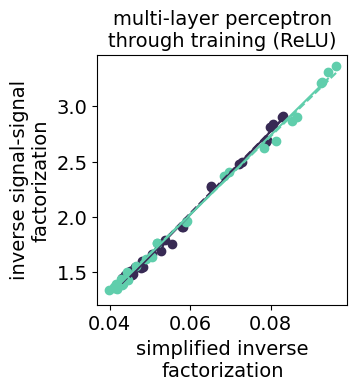

In [89]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup(ax_width, ax_height):
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    base_font_size = 14.0
    default_width = plt.rcParams['figure.figsize'][0]
    width_inches = ax_width / 0.8
    height_inches = ax_height / 0.8
    #scale_factor = width_inches / default_width
    scaled_size = base_font_size #* scale_factor
    plt.rcParams.update({
        'font.size': scaled_size,
        'axes.labelsize': scaled_size,
        'axes.titlesize': scaled_size,
        'xtick.labelsize': scaled_size,
        'ytick.labelsize': scaled_size,
        'legend.fontsize': scaled_size
    })
    fig, ax = plt.subplots(1, 1, figsize=(width_inches, height_inches))
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    return fig, ax

def plot_series_with_fit(ax, x, y, color="k", linestyle="solid", label=""):
    best_fit = LinearRegression().fit(x.reshape(-1, 1), y)
    x_min = np.min(x)
    x_max = np.max(x)
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color=color, linestyle=linestyle, label=label
    )
    ax.scatter(x, y, color=color)

def panel_mlp_relu_training(fig, ax):
    outpath = outdir + '/mlp_exps_P_500000_nonlin_relu_alpha_0.2'
    res = np.load(outpath + '/eg_geom_results.npy', allow_pickle=True).item()
    rand_layer_names, errs_the_rand, errs_emp_rand, geoms_rand , \
    trained_layer_names, errs_the_train, errs_emp_train, geoms_train, \
    val_losses, train_losses, svm_rand, svm_train, \
    derrs_t, derrs_e, dgeoms, ps, dsvm = res.values() 
    dyn_geom = dgeoms
    layer_names = trained_layer_names
    layer_inds = [3, 4, -5, -4] 

    for layer_ind, color, linestyle in zip(layer_inds, ["#382a54", "#382a54", "#60ceac", "#60ceac"], ["solid", "dashed", "solid", "dashed"]):
        plot_series_with_fit(ax, dyn_geom[:, layer_ind, 4], 1 / dyn_geom[:, layer_ind, 2], color=color, label=layer_names[layer_ind], linestyle=linestyle)

    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title("multi-layer perceptron\nthrough training (ReLU)")

fig, ax = setup(2.5, 2.5)
panel_mlp_relu_training(fig, ax)
fig

## Panel (D): tanh MLP across training

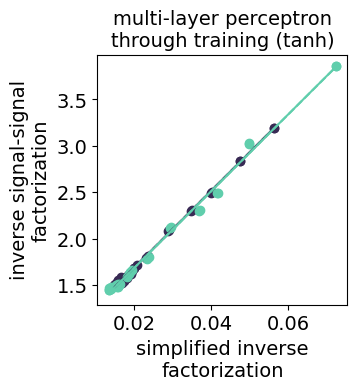

In [90]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup(ax_width, ax_height):
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    base_font_size = 14.0
    default_width = plt.rcParams['figure.figsize'][0]
    width_inches = ax_width / 0.8
    height_inches = ax_height / 0.8
    #scale_factor = width_inches / default_width
    scaled_size = base_font_size #* scale_factor
    plt.rcParams.update({
        'font.size': scaled_size,
        'axes.labelsize': scaled_size,
        'axes.titlesize': scaled_size,
        'xtick.labelsize': scaled_size,
        'ytick.labelsize': scaled_size,
        'legend.fontsize': scaled_size
    })
    fig, ax = plt.subplots(1, 1, figsize=(width_inches, height_inches))
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    return fig, ax

def plot_series_with_fit(ax, x, y, color="k", linestyle="solid", label=""):
    best_fit = LinearRegression().fit(x.reshape(-1, 1), y)
    x_min = np.min(x)
    x_max = np.max(x)
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color=color, linestyle=linestyle, label=label
    )
    ax.scatter(x, y, color=color)

def panel_mlp_tanh_training(fig, ax):
    outpath = outdir + '/mlp_exps_P_500000_nonlin_tanh_alpha_0.2'
    res = np.load(outpath + '/eg_geom_results.npy', allow_pickle=True).item()
    rand_layer_names, errs_the_rand, errs_emp_rand, geoms_rand , \
    trained_layer_names, errs_the_train, errs_emp_train, geoms_train, \
    val_losses, train_losses, svm_rand, svm_train, \
    derrs_t, derrs_e, dgeoms, ps, dsvm = res.values() 
    dyn_geom = dgeoms
    layer_names = trained_layer_names
    layer_inds = [3, 4, -5, -4] 

    for layer_ind, color, linestyle in zip(layer_inds, ["#382a54", "#382a54", "#60ceac", "#60ceac"], ["solid", "dashed", "solid", "dashed"]):
        plot_series_with_fit(ax, dyn_geom[:, layer_ind, 4], 1 / dyn_geom[:, layer_ind, 2], color=color, label=layer_names[layer_ind], linestyle=linestyle)

    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title("multi-layer perceptron\nthrough training (tanh)")

fig, ax = setup(2.5, 2.5)
panel_mlp_tanh_training(fig, ax)
fig

## Panel (E): Monkey vision (average over object categories)

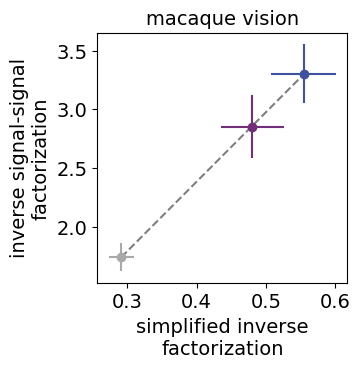

In [91]:
def hvm_class_average(fig, ax):
    # class-average figure
    path = outdir + '/majaj_res.npy' 
    res = np.load(path, allow_pickle=True).item() 
    all_cls = res['all_classes']

    emppixmed, svcpixmed, thepixmed, geompixmed = all_cls[0]
    empv4med, svcv4med, thev4med, geomv4med = all_cls[1]
    empITmed, svcITmed, theITmed, geomITmed = all_cls[2] 

    ssfs_inv_mean = np.concatenate([
        [np.mean(1 / geom[:, 3])]
        for geom in [geompixmed, geomv4med, geomITmed]
    ])
    ssfs_inv_sem = np.concatenate([
        [np.std(1 / geom[:, 3]) / np.sqrt(geom.shape[0])]
        for geom in [geompixmed, geomv4med, geomITmed]
    ])
    fact_adhocs_mean = np.concatenate([
        [np.mean(geom[:, 6])]
        for geom in [geompixmed, geomv4med, geomITmed]
    ])
    fact_adhocs_sem = np.concatenate([
        [np.std(geom[:, 6]) / np.sqrt(geom.shape[0])]
        for geom in [geompixmed, geomv4med, geomITmed]
    ])

    colors = ["#A9A9AA", "#3E529F", "#732E7A"]
    for i, (color, name) in enumerate(zip(colors, ["pixels", "V4", "IT"])):
        ax.errorbar(fact_adhocs_mean[i], ssfs_inv_mean[i], xerr=fact_adhocs_sem[i], yerr=ssfs_inv_sem[i], fmt="o", color=color, label=name)

    best_fit = LinearRegression().fit(fact_adhocs_mean.reshape(-1, 1), ssfs_inv_mean)
    residual = ssfs_inv_mean - best_fit.predict(fact_adhocs_mean.reshape(-1, 1))
    R2 = 1 - residual.var() / (ssfs_inv_mean.reshape(-1, 1)).var()
    x_min = np.min(fact_adhocs_mean)
    x_max = np.max(fact_adhocs_mean)
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color="k", alpha=0.5, linestyle="dashed"
    )
    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title(f"macaque vision")

fig, ax = setup(2.5, 2.5)
hvm_class_average(fig, ax)
fig

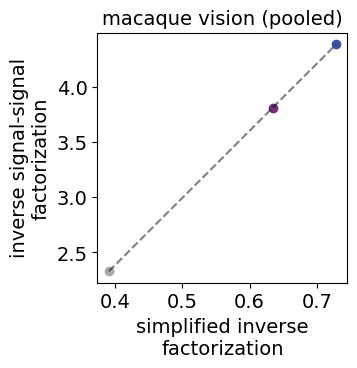

In [92]:
def hvm_pooled(fig, ax):
    # pooled figure
    path = outdir + '/majaj_res.npy' 
    res = np.load(path, allow_pickle=True).item() 
    glob_p = res['global_pooling']

    pemppixmed, psvcpixmed, pthepixmed, pgeompixmed = glob_p[0]
    pempv4med, psvcv4med, pthev4med, pgeomv4med = glob_p[1]
    pempITmed, psvcITmed, ptheITmed, pgeomITmed = glob_p[2]

    ssfs_inv_mean = np.array([
        1 / geom[3]
        for geom in [pgeompixmed, pgeomv4med, pgeomITmed]
    ])
    fact_adhocs_mean = np.array([
        geom[6]
        for geom in [pgeompixmed, pgeomv4med, pgeomITmed]
    ])

    best_fit = LinearRegression().fit(fact_adhocs_mean.reshape(-1, 1), ssfs_inv_mean)
    x_min = np.min(fact_adhocs_mean)
    x_max = np.max(fact_adhocs_mean)
    residual = ssfs_inv_mean - best_fit.predict(fact_adhocs_mean.reshape(-1, 1))
    R2 = 1 - residual.var() / (ssfs_inv_mean.reshape(-1, 1)).var()
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        color="k", alpha=0.5, linestyle="dashed"
    )

    colors = ["#A9A9AA", "#3E529F", "#732E7A"]
    for i, (color, name) in enumerate(zip(colors, ["pixels", "V4", "IT"])):
        ax.scatter(fact_adhocs_mean[i], ssfs_inv_mean[i], color=color, label=name)

    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title(f"macaque vision (pooled)")

fig, ax = setup(2.5, 2.5)
hvm_pooled(fig, ax)
fig

## Panel (G): DeepLabCut

First, update the `outdir` to the directory containing `dlc_reps.pkl`. This is the repository root folder if you want to use the cached values with a pre-trained pose estimation network. If you retrained the pose estimation network for Fig. 6 from scratch, set it to the output directory you chose for it. Set `figdir` to wherever you want to output figure panels.

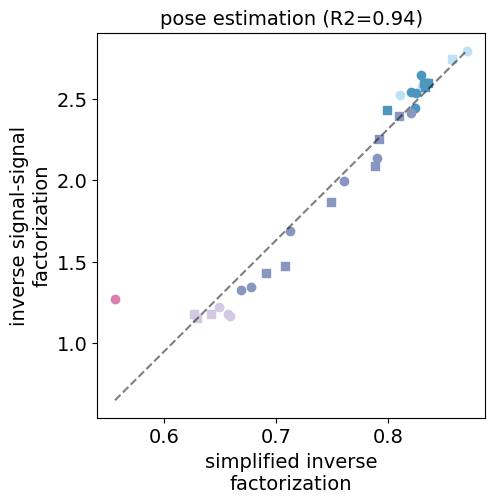

In [93]:
import pickle
import os
import numpy as np
import numpy.linalg as npl
import utils

def get_covariances(zs, xs):
    D = zs.shape[1]
    N = xs.shape[1]
    Sigma = np.cov(np.concatenate([zs, xs], axis=1).T)
    Omega = Sigma[:D, :D]
    Phi = Sigma[D:, :D]
    Psi = Sigma[D:, D:]
    return Psi, Phi, Omega

def plot_dlc_panel(fig, ax):
    zs, xs_alls = pickle.load(open(os.path.join(outdir, "../dlc_reps.pkl"), "rb"))
    ssfs_inv_mean = np.array([
        np.mean([
            1 / utils.get_geometry(*get_covariances(zs, xs), 1)[3]
            for xs in xs_all
        ])
        for xs_all in xs_alls.values()
    ])
    fact_adhocs_mean = np.array([
        np.mean([
            utils.get_geometry(*get_covariances(zs, xs), 1)[6]
            for xs in xs_all
        ])
        for xs_all in xs_alls.values()
    ])

    colors = [
        "#BDE2F7", "#4D97BE", "#8996C1", "#D3CAE2", "#D97EAD"
    ]
    names = ["block 1", "block 2", "block 3", "block 4", "deconv"]
    groups = [
        [ix for ix, label in enumerate(xs_alls.keys()) if label.startswith("b1")],
        [ix for ix, label in enumerate(xs_alls.keys()) if label.startswith("b2")],
        [ix for ix, label in enumerate(xs_alls.keys()) if label.startswith("b3")],
        [ix for ix, label in enumerate(xs_alls.keys()) if label.startswith("b4")],
        [ix for ix, label in enumerate(xs_alls.keys()) if label.startswith("pred")]
    ]
    relu_ix = [ix for ix, label in enumerate(xs_alls.keys()) if label.endswith("_relu")]

    best_fit = LinearRegression().fit(fact_adhocs_mean.reshape(-1, 1), ssfs_inv_mean.reshape(-1, 1))
    x_min = np.min(fact_adhocs_mean)
    x_max = np.max(fact_adhocs_mean)

    residual = ssfs_inv_mean.reshape(-1, 1) - best_fit.predict(fact_adhocs_mean.reshape(-1, 1))
    R2 = 1 - residual.var() / ssfs_inv_mean.var()

    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        alpha=0.5, color="k", linestyle="dashed"
    )

    for name, color, group in zip(names, colors, groups):
        group_relu = np.intersect1d(relu_ix, group)
        group_linear = np.setdiff1d(group, group_relu)

        ax.scatter(
            fact_adhocs_mean[group_relu], ssfs_inv_mean[group_relu], color=color, marker="s", label=name
        )
        ax.scatter(
            fact_adhocs_mean[group_linear], ssfs_inv_mean[group_linear], color=color, marker="o"
        )

    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")
    ax.set_title("pose estimation (R2={:.2f})".format(R2))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_dlc_panel(fig, ax)
fig

## Panel (H): Rat PFC

First, update the `outdir` to the directory containing `PFC_results(...).pkl` and `CA1_results(...).pkl`. This is the folder `results` in this respository if you want to use the cached values.

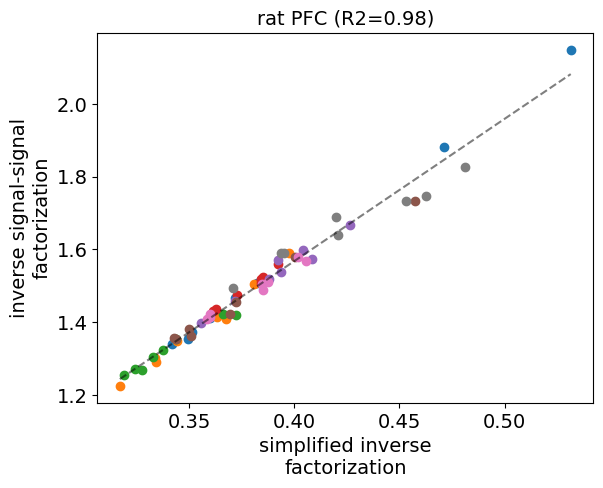

In [94]:
def rat_pfc(fig, ax):
    dt=0.5
    arrca1 = np.load(outdir + f'/PFC_results_nu_dt_{dt}_ns_500_P_300.npy',
                    allow_pickle=True).item() 
    errs_ca1, all_geoms_ca1 = arrca1['errs'], arrca1['all_geoms']
    fact_adhoc_all = np.mean(all_geoms_ca1, axis=0)[..., 6]
    ssf_inv_mean = 1 / np.mean(all_geoms_ca1[..., 3], axis=0)

    for rat_ix in range(8):
        ax.scatter(fact_adhoc_all[rat_ix], ssf_inv_mean[rat_ix], label=f"rat {rat_ix}")

    best_fit = LinearRegression().fit(fact_adhoc_all.reshape(-1, 1), ssf_inv_mean.reshape(-1, 1))
    residual = best_fit.predict(fact_adhoc_all.reshape(-1, 1)) - ssf_inv_mean.reshape(-1, 1)
    x_min = np.min(fact_adhoc_all)
    x_max = np.max(fact_adhoc_all)
    R2 = 1 - residual.var() / (ssf_inv_mean.reshape(-1, 1)).var()
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        alpha=0.5, color="k", linestyle="dashed"
    )
    ax.set_title(f"rat PFC (R2={R2:.2f})")
    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")

fig, ax = plt.subplots()
rat_pfc(fig, ax)
fig

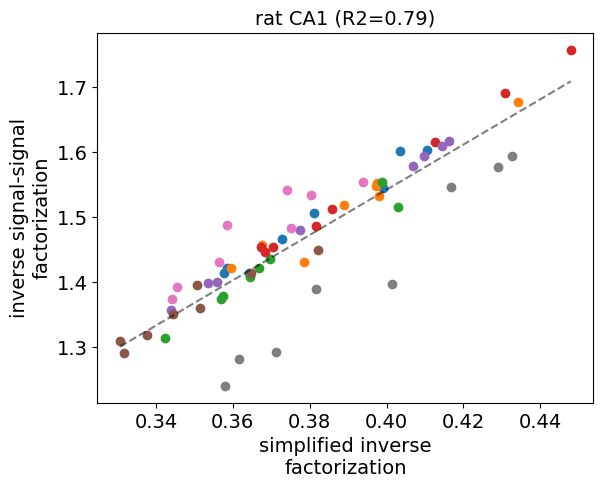

In [95]:
def rat_ca1(fig, ax):
    dt=0.5
    arrca1 = np.load(outdir + f'/CA1_results_nu_dt_{dt}_ns_500_P_300.npy',
                    allow_pickle=True).item() 
    errs_ca1, all_geoms_ca1 = arrca1['errs'], arrca1['all_geoms']
    fact_adhoc_all = np.mean(all_geoms_ca1, axis=0)[..., 6]
    ssf_inv_mean = 1 / np.mean(all_geoms_ca1[..., 3], axis=0)

    for rat_ix in range(8):
        ax.scatter(fact_adhoc_all[rat_ix], ssf_inv_mean[rat_ix], label=f"rat {rat_ix}")

    best_fit = LinearRegression().fit(fact_adhoc_all.reshape(-1, 1), ssf_inv_mean.reshape(-1, 1))
    residual = best_fit.predict(fact_adhoc_all.reshape(-1, 1)) - ssf_inv_mean.reshape(-1, 1)
    x_min = np.min(fact_adhoc_all)
    x_max = np.max(fact_adhoc_all)
    R2 = 1 - residual.var() / (ssf_inv_mean.reshape(-1, 1)).var()
    ax.plot(
        [x_min, x_max],
        best_fit.predict(np.array([x_min, x_max]).reshape(-1, 1)),
        alpha=0.5, color="k", linestyle="dashed"
    )
    ax.set_title(f"rat CA1 (R2={R2:.2f})")
    ax.set_xlabel("simplified inverse\nfactorization")
    ax.set_ylabel("inverse signal-signal\nfactorization")

fig, ax = plt.subplots()
rat_ca1(fig, ax)
fig

## Assemble panels

In [ ]:
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 14

MEDIUM_SIZE = 14 * 3/4
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.6)

panel_mlp_relu_layerwise(fig, axs[0, 0])
panel_mlp_tanh_layerwise(fig, axs[0, 1])
panel_mlp_relu_training(fig, axs[0, 2])
panel_mlp_tanh_training(fig, axs[1, 0])
hvm_class_average(fig, axs[1, 1])
hvm_pooled(fig, axs[1, 2])
plot_dlc_panel(fig, axs[2, 0])
rat_pfc(fig, axs[2, 1])
rat_ca1(fig, axs[2, 2])
fig.savefig(figdir + '/sm-factorization.pdf', dpi=300, transparent=True)